In [1]:
#Loading a Dataset
import pandas as pd
import matplotlib.pyplot as plt
#Paysim Synthetic Mobile Money Dataset
url = 'https://raw.githubusercontent.com/ahmednagydewair/Fraud-Detection-/master/final.csv'
df = pd.read_csv(url)
print(df['isFraud'].value_counts())
#In Ratio
df['isFraud'].value_counts(normalize=True)


isFraud
0    49900
1      100
Name: count, dtype: int64


isFraud
0    0.998
1    0.002
Name: proportion, dtype: float64

In [2]:
df.head()


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
#Features

In [4]:
df.shape

(50000, 12)

In [5]:
df.size

600000

In [6]:
df.dtypes

Unnamed: 0          int64
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.ndim

2

In [8]:
#understanding Features 
#Column Name	    Description
#step	        Time step (in hours) from the beginning of the simulation
#type	        Type of transaction (e.g., PAYMENT, CASH_OUT, TRANSFER, etc.)
#amount	        Amount of the transaction
#nameOrig	    Customer initiating the transaction (ID, not a real name)
#oldbalanceOrg	Account balance of nameOrig before transaction
#newbalanceOrig	Account balance of nameOrig after transaction
#nameDest	    Recipient of the transaction
#oldbalanceDest	Balance of nameDest before transaction
#newbalanceDest	Balance of nameDest after transaction
#isFraud	    Target  column: 1 = Fraudulent, 0 = Legitimate
#isFlaggedFraud 	Was the transaction flagged as fraud by the system? (1 = Yes, 0 = No)

In [9]:
df.nameOrig.nunique()

50000

In [10]:
#By deafault  drop method will be accessed on row to indicate that we want  to drop column we use axis parameter .By default axis parameter is 0 (row) 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
df.nunique()

step                  9
type                  5
amount            49786
nameOrig          50000
oldbalanceOrg     30572
newbalanceOrig    24328
nameDest          28499
oldbalanceDest    25369
newbalanceDest     9367
isFraud               2
isFlaggedFraud        1
dtype: int64

In [13]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB


In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.0
mean,7.453800,1.562645e+05,7.333083e+05,7.472741e+05,8.444671e+05,1.164400e+06,0.002000,0.0
std,2.056636,3.243949e+05,2.202405e+06,2.239971e+06,2.433388e+06,2.915203e+06,0.044677,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,7.734573e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,3.341482e+04,1.703072e+04,0.000000e+00,2.126000e+03,0.000000e+00,0.000000,0.0
75%,9.000000,1.878390e+05,1.331716e+05,1.438734e+05,4.632050e+05,8.649264e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.014320e+07,3.197699e+07,1.000000,0.0


In [16]:
# for checking duplicates
print(df.duplicated().sum())


0


In [17]:
#EDA- Exploratory Data Analysis
#1️⃣ Data Overview
# 2️⃣ Data Types and Information(features)
# 3️⃣ Summary Statistics(info,describe etc)
# 4️⃣ Missing Value Analysis(isnull().sum())
# 5️⃣ Duplicate Record Check(checking for duplicates)
# 6️⃣ Univariate Analysis
# 7️⃣ Bivariate Analysis
# 8️⃣ Multivariate Analysis
# 9️⃣ Outlier Detection
# 🔟 Feature Engineering
# 1️⃣1️⃣ Class Imbalance Check
# 1️⃣2️⃣ Insights and Observations

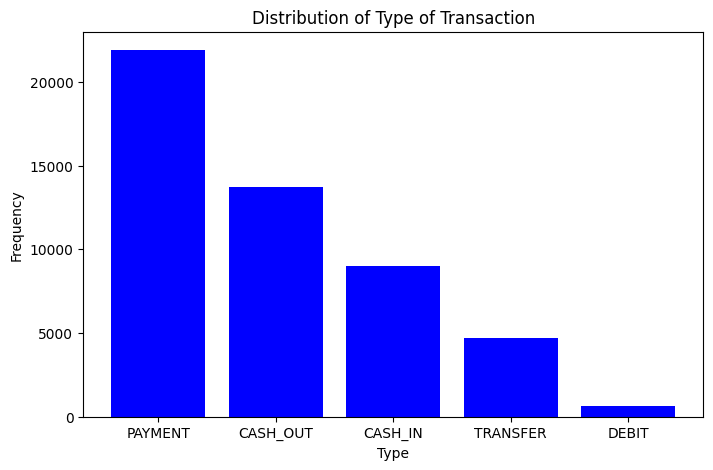

In [18]:
#Univariate Analysis(Categorical analysis)
#helps to depict the which type of transaction  is done by people mostly
s1=df['type'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(s1.index,s1.values,color='blue')
plt.title('Distribution of Type of Transaction')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()


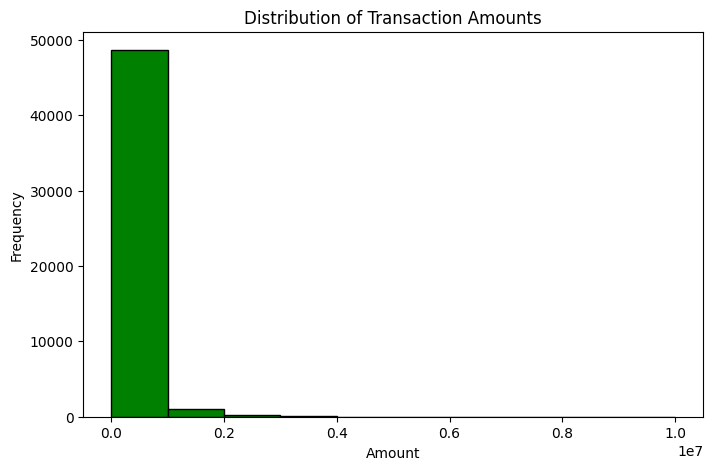

In [19]:
#univariate(Numerical Analysis)
#How are transaction amounts distributed overall 
plt.figure(figsize=(8, 5))
plt.hist(df['amount'],color='green', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


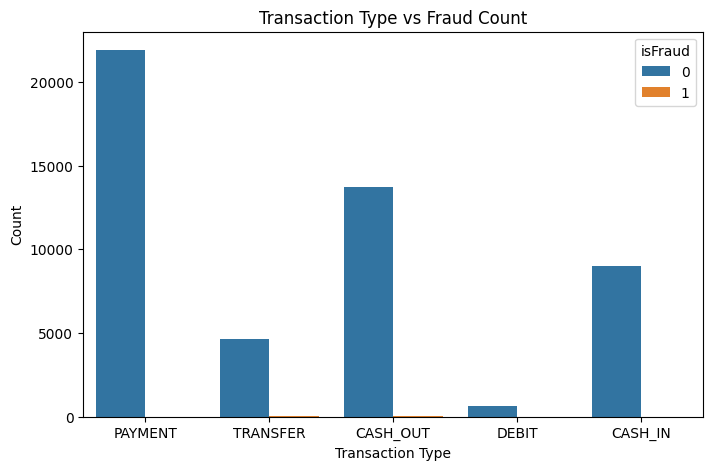

In [20]:
#Bivariant Analysis
#THE TYPE of feature having more fraud transactions
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type vs Fraud Count')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


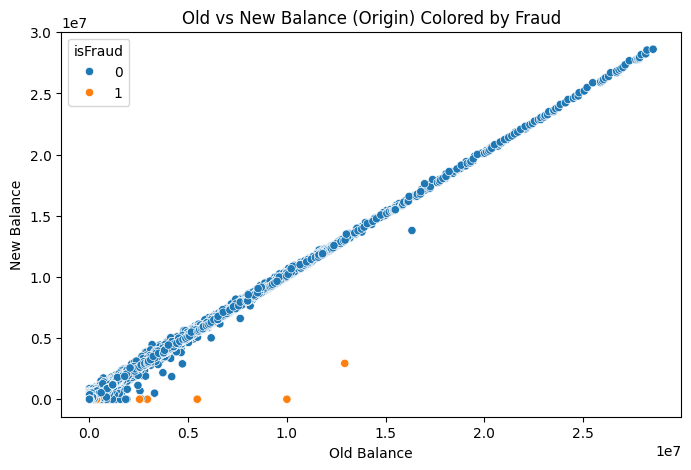

In [21]:
#Bivariate analysis
#Fraud transactions are often those that empty the account
plt.figure(figsize=(8, 5))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=df)
plt.title('Old vs New Balance (Origin) Colored by Fraud')
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.show()
#depicts the fraud transactions 


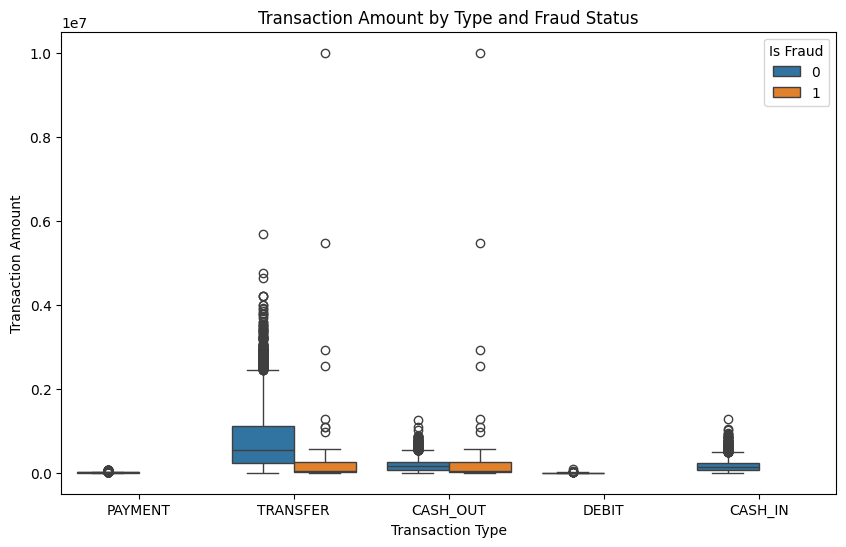

In [22]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df)
plt.title('Transaction Amount by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()


In [23]:
# Calculating Q1 and Q3
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outliers
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print(f"Number of outliers in 'amount': {len(outliers)}")

#identifying the no of outliers of each category (fraud or not fraud)
outlier_fraud_counts = outliers['isFraud'].value_counts()
print("Fraud counts among amount outliers:")
print(outlier_fraud_counts)

Number of outliers in 'amount': 3503
Fraud counts among amount outliers:
isFraud
0    3486
1      17
Name: count, dtype: int64


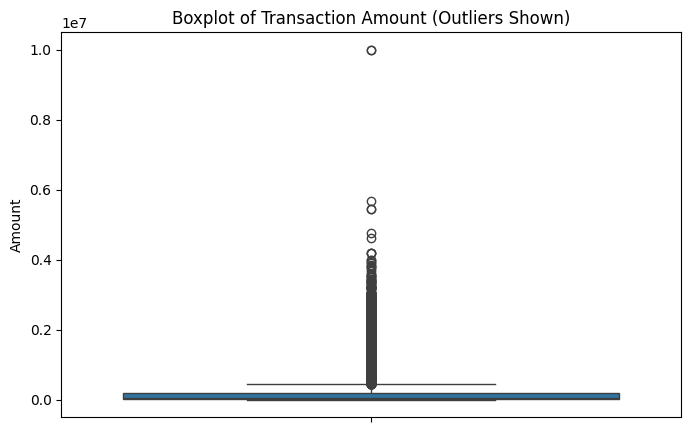

In [24]:
#visualizing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y='amount', data=df)
plt.title('Boxplot of Transaction Amount (Outliers Shown)')
plt.ylabel('Amount')
plt.show()


In [25]:
df['amount'] = df['amount'].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

In [26]:
# What is Feature Engineering?
#Feature Engineering is the process of creating, modifying, or selecting the best features (columns) from raw data to improve model performance.

In [27]:
# Difference in origin account balance
df['balance_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Difference in destination account balance
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
#from the above lines
#balance_diff_orig > 0 and balance_diff_dest = 0(Yes[fraud])
#balance_diff_dest is negative (money removed from destination)(Yes[fraud])
#balance_diff_orig = amount and balance_diff_dest = amount(no[not fraud])

In [28]:
#converting catergorical to numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])



In [29]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_orig,balance_diff_dest,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,9839.64,0.00,3
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,1864.28,0.00,3
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,181.00,0.00,4
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,181.00,-21182.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,11668.14,0.00,3
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,7817.71,0.00,3
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,7107.77,0.00,3
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,7861.64,0.00,3
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,2671.00,0.00,3
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,5337.77,-1549.21,2


In [30]:
df.drop(['type','nameOrig','nameDest'],axis=1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_orig,balance_diff_dest,type_encoded
0,1,9839.64,170136.00,160296.36,0.0,0.0,0,0,9839.64,0.0,3
1,1,1864.28,21249.00,19384.72,0.0,0.0,0,0,1864.28,0.0,3
2,1,181.00,181.00,0.00,0.0,0.0,1,0,181.00,0.0,4
3,1,181.00,181.00,0.00,21182.0,0.0,1,0,181.00,-21182.0,1
4,1,11668.14,41554.00,29885.86,0.0,0.0,0,0,11668.14,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
49995,9,1322.91,1208457.61,1207134.71,0.0,0.0,0,0,1322.90,0.0,3
49996,9,6900.48,1207134.71,1200234.22,0.0,0.0,0,0,6900.49,0.0,3
49997,9,17399.12,1200234.22,1182835.10,0.0,0.0,0,0,17399.12,0.0,3
49998,9,5485.20,1182835.10,1177349.90,0.0,0.0,0,0,5485.20,0.0,3


In [2]:
CONCLUSIONS:
#After working on this fraud detection dataset, we can conclude the following:

#The dataset is highly imbalanced, with only a small percentage of transactions marked as fraud.

#TRANSFER and CASH_OUT are the only transaction types associated with fraudulent activity.

#Fraudulent transactions typically involve higher transaction amounts compared to legitimate ones.

#Using balance difference features, it was found that in fraud cases, the money is often deducted from the sender but not received by the receiver.

#Negative or zero balance updates on the receiver side (balance_diff_dest) are common patterns in fraudulent transactions.

#Boxplots and histograms revealed that outliers in transaction amount are strongly linked with fraud.

#Most non-fraud transactions had either no balance movement on the destination side or matched the transaction amount.

#Features like balance_diff_orig, balance_diff_dest, and amount show a strong correlation with fraud behavior.

#The dataset is now ready for machine learning model training, with strong engineered features that can help improve fraud detection accuracy.'''